In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [26]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /content/rockpaperscissors.zip

--2020-06-27 03:36:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  14.4MB/s    in 17s     

2020-06-27 03:36:31 (18.2 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]



In [27]:
import zipfile,os
zip1="/content/rockpaperscissors.zip"
ref_zip= zipfile.ZipFile(zip1,"r")
ref_zip.extractall("/content")
ref_zip.close()



In [38]:

base_dir='/content/rockpaperscissors/rps-cv-images'
train_dir= os.path.join(base_dir)
validat_dir= os.path.join(base_dir)


In [39]:
os.listdir('/content/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

In [40]:
train_paper_dir = os.path.join(train,"paper")
train_scissors_dir = os.path.join(train,"scissors")
train_rock_dir = os.path.join(train,"rock")

validat_paper_dir = os.path.join(validat,"paper")
validat_scissors_dir = os.path.join(validat,"scissors")
validat_rock_dir = os.path.join(validat,"rock")

In [245]:
datagen = ImageDataGenerator(validation_split=0.3,rescale=1./255)
train_gene= datagen.flow_from_directory(
            train_dir,
            subset="training",
            target_size=(150,150),
            batch_size=3,
            class_mode="categorical"
                )

validation_gene= datagen.flow_from_directory(
            validat_dir,
            subset="validation",
            target_size=(150,150),
            batch_size=3,
            class_mode="categorical"
                )


Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [255]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(3,activation="softmax")
])

In [256]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 18496)           

In [260]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.SGD()
              ,metrics=['accuracy'])

In [261]:

model.fit(
          train_gene,
          steps_per_epoch=100,
          epochs=10,
          validation_data=validation_gene,
          validation_steps=5,
          verbose=1
)

Epoch 1/10
100/100 [==============================] - 22s 217ms/step - loss: 1.0663 - accuracy: 0.4133 - val_loss: 0.9940 - val_accuracy: 0.4000
Epoch 2/10
100/100 [==============================] - 21s 215ms/step - loss: 0.8030 - accuracy: 0.6700 - val_loss: 0.4933 - val_accuracy: 0.8000
Epoch 3/10
100/100 [==============================] - 22s 217ms/step - loss: 0.6152 - accuracy: 0.7533 - val_loss: 0.3566 - val_accuracy: 0.8667
Epoch 4/10
100/100 [==============================] - 22s 216ms/step - loss: 0.4456 - accuracy: 0.8367 - val_loss: 0.5659 - val_accuracy: 0.8667
Epoch 5/10
100/100 [==============================] - 22s 215ms/step - loss: 0.3807 - accuracy: 0.8533 - val_loss: 0.4622 - val_accuracy: 0.8000
Epoch 6/10
100/100 [==============================] - 22s 216ms/step - loss: 0.3843 - accuracy: 0.8533 - val_loss: 0.4119 - val_accuracy: 0.7333
Epoch 7/10
100/100 [==============================] - 22s 215ms/step - loss: 0.3237 - accuracy: 0.8733 - val_loss: 0.1506 - val_ac

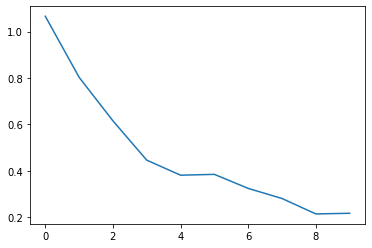

In [262]:
plt.plot(model.history.history["loss"])

Saving 2tRxoWcFfrvjsHTZ.png to 2tRxoWcFfrvjsHTZ.png
2tRxoWcFfrvjsHTZ.png
[[3.2806486e-16 0.0000000e+00 1.0000000e+00]]
scissors


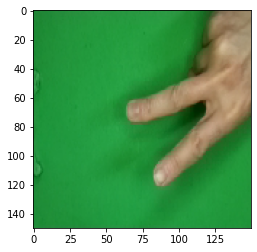

In [271]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)

  class_lables = list(train_gene.class_indices.keys())

  print(classes)
  class_indice = 0
  for i in range(len(classes[0])):
      if classes[0][i] > classes[0][0]:
          class_indice = i
  test_class = class_lables[class_indice]
  print(test_class)

IndentationError: ignored